# PS4
## Name : Rohit Gangurde
## Collaborators : NA

****
### Q. 1

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X, y = load_iris(return_X_y=True)

In [5]:
def estimate_k(X, visualize=False):
    """
        The procedure to estimate k is as follows :
            * Retrieve the inertia values for k clusters
            * Calculate the elbow point by getting the cluster with the maximum difference in slope values
        In other words, we are looking at the difference in the first derivative values to inform our estimation of k. 
    """
    K = list(range(2, 10)) # number of clusters to estimate from 
    elbows = {} # a dictionary to store the inertia values for each cluster
    for k in K :
        model = KMeans(n_clusters=k, random_state=10)
        model.fit(X)
        elbows[k] = model.inertia_
    
    slopes = {} # a dictionary to store the difference in previous and next slope values
    for i in range(len(K)):
        
        if i != 0 and i != len(K) - 1 :  # ignore the first and last cluster
            prev = elbows[K[i-1]] # elbow value for the previous cluster, can be imagined as y1
            nxt = elbows[K[i+1]] # elbow value for the next cluster, can be imagined as y2
            curr = elbows[K[i]] # elbow value for the next cluster, can be imagined as y
            """
                Calculate the slope for points (x, y) , (x1, y1)
                    x -> current cluster number, eg. 3
                    x1 -> previous cluster number, eg. 2
                
                Slope = (y - y1) / (x - x1)
            """
            prev_slope = abs((curr - prev) / (K[i] - K[i-1]))
            """
                Calculate the slope for points (x, y) , (x2, y2)
                    x -> current cluster number, eg. 3
                    x2 -> previous cluster number, eg. 4
                
                Slope = (y - y1) / (x - x1)
            """
            nxt_slope = abs((curr - nxt) / (K[i] - K[i+1]))
            """
                Store the difference in the previous slope [ (y - y1)/(x - x1) ] and 
                the next slope [ (y - y2)/(x - x2) ]
            """
            slopes[K[i]] = abs(prev_slope - nxt_slope)
    """
        The elbow point can be found by looking at the difference in slopes.
        The cluster with the highest difference in previous and next slope is the elbow point.
    """
    values = list(slopes.values())
    elbow_point = values.index(max(values))
    elbow_point = list(slopes.keys())[elbow_point]
        
    return elbow_point if visualize == False else elbow_point, elbows, slopes

In [6]:
k, elbows, slopes = estimate_k(X, visualize=True)
print("Estimated K : {}".format(k))

Estimated K : 3


## Visual example

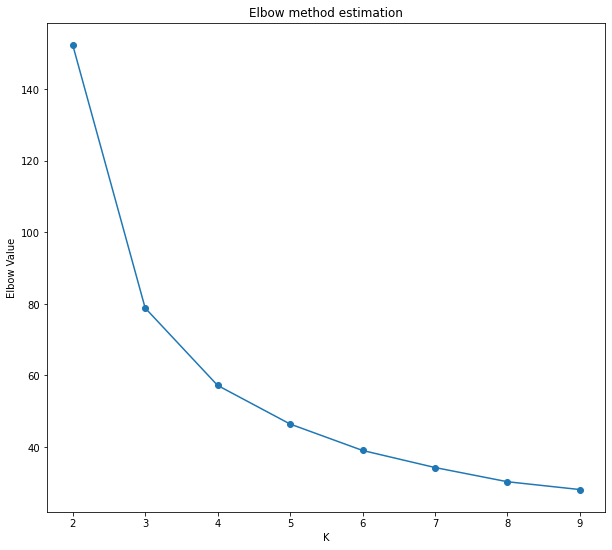

In [7]:
"""
    Plotting elbow values
"""

plt.figure(figsize=(10,9))
plt.plot(elbows.keys(), elbows.values(), 'o-')
plt.xlabel('K')
plt.ylabel('Elbow Value')
plt.title('Elbow method estimation')
plt.show()

From the above graph it is clear that $k = 3$ is a good candidate for $k$.
    
To programatically infer the best value of k using the elbow point, we look at the difference in the first derivative values.
For example, for $k = 3$, 
                        
   * Prev slope is for points : $(3, Elbow_{3})$ and $(2, Elbow_{2})$
   * Next slope is for points : $(3, Elbow_{3})$ and $(4, Elbow_{4})$

An elbow point will have the highest difference between the prev slope and the next slope value.

Let's look at the difference in slope values for each k.

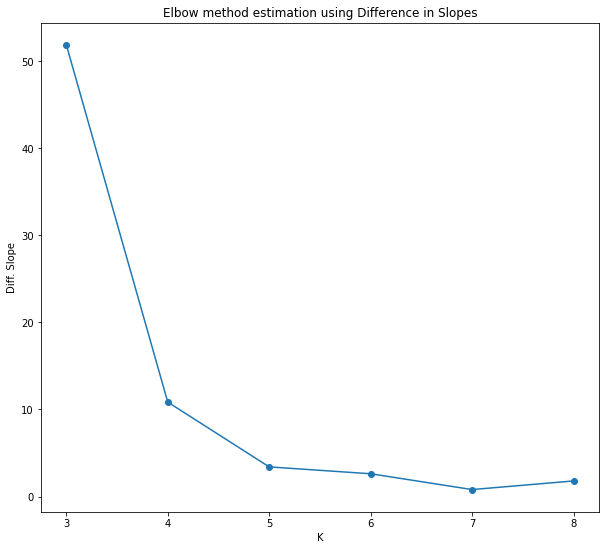

In [8]:
plt.figure(figsize=(10,9))
plt.plot(slopes.keys(), slopes.values(), 'o-')
plt.xlabel('K')
plt.ylabel('Diff. Slope')
plt.title('Elbow method estimation using Difference in Slopes')
plt.show()

We can see that k = 3 has the maximum difference of prev. and next slope and hence it is a good candidate for the number of clusters.

****
## Q. 2

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Z = pca.fit_transform(X)
color = ['red', 'blue','green']

In [10]:
kmeans = KMeans(n_clusters=3)
pred_kmeans = kmeans.fit_predict(X)

In [11]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.6, algorithm='kd_tree')
pred_db = db.fit_predict(X)

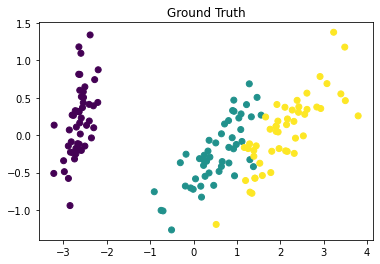

In [12]:
plt.scatter(Z[:,0], Z[:,1], c=y)
plt.title('Ground Truth')
plt.show()

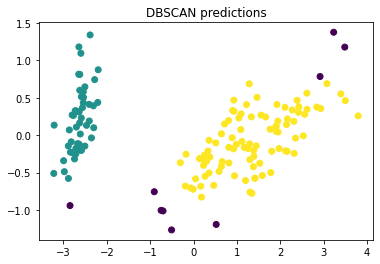

In [13]:
plt.scatter(Z[:,0], Z[:,1], c=pred_db)
plt.title('DBSCAN predictions')
plt.show()

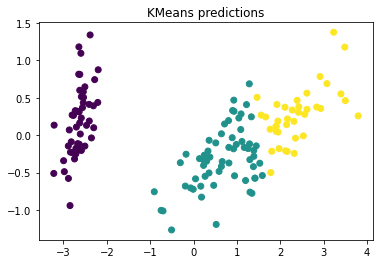

In [14]:
plt.scatter(Z[:,0], Z[:,1], c=pred_kmeans)
plt.title('KMeans predictions')
plt.show()

In [15]:
from sklearn.metrics.cluster import homogeneity_completeness_v_measure

print('KMeans : {}'.format(homogeneity_completeness_v_measure(y, pred_kmeans)))
print('DBScan : {}'.format(homogeneity_completeness_v_measure(y, pred_db)))

KMeans : (0.7514854021988338, 0.7649861514489815, 0.7581756800057784)
DBScan : (0.5603289248571279, 0.7380130903203164, 0.6370125538503075)


In [51]:
db = DBSCAN(eps=0.76, min_samples=10, algorithm='kd_tree')
pred_db = db.fit_predict(X)

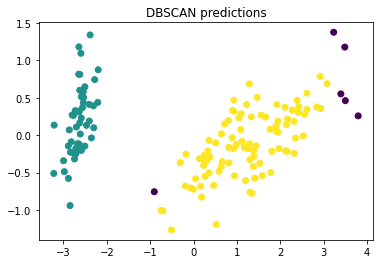

In [52]:
plt.scatter(Z[:,0], Z[:,1], c=pred_db)
plt.title('DBSCAN predictions')
plt.show()

In [53]:
print('KMeans : {}'.format(homogeneity_completeness_v_measure(y, pred_kmeans)))
print('DBScan : {}'.format(homogeneity_completeness_v_measure(y, pred_db)))

KMeans : (0.7514854021988338, 0.7649861514489815, 0.7581756800057784)
DBScan : (0.5887292187391653, 0.8209747807032686, 0.6857210328397454)


## Performance Comparison

**K-Means :**
> The KMeans model with `n_clusters = 3` performed way better than DBScan model.
>
> It had a homogeneity score of $0.752$. The model did a good job of seperating similar samples into clusters. Ofcourse because the score is not $1$, the model can do better in terms of clustering similar samples.
>
> The completeness score was $0.765$. The model did not assign class members to the same class otherwise we would have had a score of $1$.

**DBScan :**
> The DBScan model with `eps=0.6` and using `kd_tree` algorithm, the model got a homogeneity score of $0.560$. The model performed poorly when compared to the KMeans model. 
>
> The model with `eps=0.76` and `min_samples=10`, the homogeneity score bumped upto $0.589$. This is an improvement but still the model is lacking in the clustering capabilities.
>
> The completeness score is better on the second variant of the DBScan model.

* It is clear that the DBScan model is clearly subpar to the K-Means model. 
* It doesn't necessarily mean that the DBScan is objectively subpar to K-Means.
* Because the Iris dataset has known number of clusters, the K-Means can perform efficiently on the iris dataset. The K-Means algortihm's parameter is `n_clusters`, which is what is needed to work with Iris dataset.
* The DBScan algorithm's parameters are `eps` - maximum distance to be considered in the neighborhood, and `min_samples` - no. of samples in neighborhood. There is no parameter which can be used to specify the number of clusters.
* So, the DBScan algorithm is not well suited to this type of dataset. 
* DBScan can be efficient in exploratory purposes where the aim is to understand the underlying structure.

## K-Fold Cross validation

> K-Fold cross validation works by splitting dataset into k groups and each group is part of the training data and the testing data and evaluate the machine learning model.
>
> Using this in conjunction with K-Means or DBScan will not help in evaluating the performance. 
>
> K-Means works by looking at the data and picking out centroids. If the data is different every time, the centroids won't be consistent and hence the clusters will be different everytime.
>
> DBScan starts out by picking a random point as core point and clustering by looking at its neighborhood determined by the eps parameter. If some points are taken out of the dataset, the clustering results won't be consistent.
>
> K-Means and DBScan algorithms are sensitive to the data. Using K-Fold cross validation, the dataset will be different everytime and may be the centroids/core points won't be a part of the training data resulting in varied clusters. 